<a href="https://colab.research.google.com/github/we-make-ai/siamese_face_verification/blob/master/Siamese_Face_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai2
!pip install gdown
!pip install nbdev
from fastai2.data.external import untar_data,URLs
from fastai2.data.transforms import get_image_files
from fastai2.vision.all import *
import PIL

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.11.1-py3-none-any.whl size=9656 sha256=834da083a88b5ee3e0e28ba60283f26ad4f32227a6a05df1d0721435dd58a90a
  Stored in directory: /home/bmayr/.cache/pip/wheels/ac/0f/65/f8898ba51a103158b41f418d2a37cc928471624397da3af2f4
Successfully built gdown


In [1]:
from fastai2.data.external import untar_data,URLs
from fastai2.data.transforms import get_image_files
from fastai2.vision.all import *
import PIL

# Downloading Training and Testdata

## A simple AT&T facial images Testset
... contains only 40 different people

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
!gdown https://drive.google.com/uc?id=1E7YOlwok4ENUrA4mP35GzGnIS6mP1xB8
!unzip att_face_dataset.zip -d images/train

Downloading...
From: https://drive.google.com/uc?id=1E7YOlwok4ENUrA4mP35GzGnIS6mP1xB8
To: /content/att_face_dataset.zip
3.78MB [00:00, 119MB/s]
Archive:  att_face_dataset.zip
replace images/train/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/train/s1/1.pgm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!gdown https://drive.google.com/uc?id=1A3fuK50ukiYN_CI9k6GHHr45OtcSq9vT
!unzip test_images.zip -d images/
!mv images/test_images/ images/test
!rm -r images/__MACOSX

Downloading...
From: https://drive.google.com/uc?id=1A3fuK50ukiYN_CI9k6GHHr45OtcSq9vT
To: /content/test_images.zip
3.44MB [00:00, 107MB/s]
Archive:  test_images.zip
   creating: images/test_images/
  inflating: images/test_images/.DS_Store  
  inflating: images/__MACOSX/test_images/._.DS_Store  
   creating: images/test_images/h/
   creating: images/test_images/b/
  inflating: images/test_images/h/9.jpg  
  inflating: images/__MACOSX/test_images/h/._9.jpg  
  inflating: images/test_images/h/5.jpg  
  inflating: images/__MACOSX/test_images/h/._5.jpg  
  inflating: images/test_images/h/7.jpg  
  inflating: images/__MACOSX/test_images/h/._7.jpg  
  inflating: images/test_images/h/2.jpg  
  inflating: images/__MACOSX/test_images/h/._2.jpg  
  inflating: images/test_images/h/3.jpg  
  inflating: images/__MACOSX/test_images/h/._3.jpg  
  inflating: images/test_images/b/8.jpg  
  inflating: images/__MACOSX/test_images/b/._8.jpg  
  inflating: images/test_images/b/10.jpg  
  inflating: images/

## Setting Paths, etc.

In [2]:
!nvidia-smi

Sat Jul 18 10:02:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 435.21       Driver Version: 435.21       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
|  0%   35C    P8     9W / 200W |    234MiB /  8116MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
path = Path()
files = get_image_files(path/"images")
files[0]

Path('images/test/b/1.jpg')

In [ ]:
len(files)

420

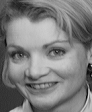

In [ ]:
img = PIL.Image.open(files[100])
img

In [12]:
import re
def label_func(fname):
    #return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]
    return parent_label(fname)

label_func(files[0])

'00000637'

## Google facial expression comparison dataset
https://storage.googleapis.com/public_release/FEC_dataset.zip
https://research.google/tools/datasets/google-facial-expression/

## Use only small subset with 1000 images

In [5]:
!gdown https://drive.google.com/uc?id=1-D_ar6FxqD6suXDsMohNlVUxnI8UsbHD

Downloading...
From: https://drive.google.com/uc?id=1-D_ar6FxqD6suXDsMohNlVUxnI8UsbHD
To: /home/bmayr/Dokumente/Projekte_lokal/MachineLearning/siamese_face_verification/google_face_images_dataset_small.tar.gz
210MB [02:10, 1.61MB/s] 


In [4]:
!ls

google_face_images_dataset		 Siamese_Face_Verification.ipynb
google_face_images_dataset_small.tar.gz


In [9]:
!tar -xvz -f google_face_images_dataset_small.tar.gz

data/images/
data/images/00000629/
data/images/00000629/00000629_32.jpg
data/images/00000629/00000629_9.jpg
data/images/00000629/00000629_18.jpg
data/images/00000629/00000629_26.jpg
data/images/00000629/00000629_38.jpg
data/images/00000629/00000629_7.jpg
data/images/00000629/00000629_35.jpg
data/images/00000629/00000629_34.jpg
data/images/00000629/00000629_33.jpg
data/images/00000629/00000629_24.jpg
data/images/00000629/00000629_23.jpg
data/images/00000629/00000629_21.jpg
data/images/00000629/00000629_15.jpg
data/images/00000629/00000629_5.jpg
data/images/00000629/00000629_0.jpg
data/images/00000629/00000629_36.jpg
data/images/00000629/00000629_13.jpg
data/images/00000629/00000629_4.jpg
data/images/00000629/00000629_19.jpg
data/images/00000629/00000629_27.jpg
data/images/00000629/00000629_20.jpg
data/images/00000629/00000629_39.jpg
data/images/00000629/00000629.jpg
data/images/00000629/00000629_25.jpg
data/images/00000629/00000629_3.jpg
data/images/00000629/00000629_10.jpg
data/images/

data/images/00000239/00000239_11.jpg
data/images/00000239/00000239_31.jpg
data/images/00000239/00000239_33.jpg
data/images/00000239/00000239_20.jpg
data/images/00000239/00000239_13.jpg
data/images/00000239/00000239_1.jpg
data/images/00000239/00000239_8.jpg
data/images/00000239/00000239_0.jpg
data/images/00000239/00000239_16.jpg
data/images/00000239/00000239_24.jpg
data/images/00000239/00000239_22.jpg
data/images/00000239/00000239_38.jpg
data/images/00000239/00000239_25.jpg
data/images/00000239/00000239_32.jpg
data/images/00000239/00000239_10.jpg
data/images/00000239/00000239_21.jpg
data/images/00000239/00000239_39.jpg
data/images/00000239/00000239_4.jpg
data/images/00000239/00000239_19.jpg
data/images/00000239/00000239_15.jpg
data/images/00000239/00000239_36.jpg
data/images/00000239/00000239_29.jpg
data/images/00000239/00000239_2.jpg
data/images/00000239/00000239_5.jpg
data/images/00000239/00000239_23.jpg
data/images/00000239/00000239_18.jpg
data/images/00000239/00000239.jpg
data/image

data/images/00000748/00000748_1.jpg
data/images/00000748/00000748_28.jpg
data/images/00000857/
data/images/00000857/00000857_38.jpg
data/images/00000857/00000857_25.jpg
data/images/00000857/00000857_10.jpg
data/images/00000857/00000857_4.jpg
data/images/00000857/00000857_22.jpg
data/images/00000857/00000857_9.jpg
data/images/00000857/00000857_1.jpg
data/images/00000857/00000857_15.jpg
data/images/00000857/00000857_14.jpg
data/images/00000857/00000857_27.jpg
data/images/00000857/00000857_7.jpg
data/images/00000857/00000857_0.jpg
data/images/00000857/00000857_19.jpg
data/images/00000857/00000857_20.jpg
data/images/00000857/00000857.jpg
data/images/00000857/00000857_34.jpg
data/images/00000857/00000857_11.jpg
data/images/00000857/00000857_36.jpg
data/images/00000857/00000857_37.jpg
data/images/00000857/00000857_24.jpg
data/images/00000857/00000857_3.jpg
data/images/00000857/00000857_31.jpg
data/images/00000857/00000857_21.jpg
data/images/00000857/00000857_28.jpg
data/images/00000857/00000

data/images/00000419/00000419_23.jpg
data/images/00000419/00000419_4.jpg
data/images/00000419/00000419_35.jpg
data/images/00000419/00000419.jpg
data/images/00000419/00000419_11.jpg
data/images/00000419/00000419_6.jpg
data/images/00000419/00000419_13.jpg
data/images/00000419/00000419_19.jpg
data/images/00000789/
data/images/00000789/00000789_27.jpg
data/images/00000789/00000789_32.jpg
data/images/00000789/00000789_18.jpg
data/images/00000789/00000789_13.jpg
data/images/00000789/00000789_20.jpg
data/images/00000789/00000789_28.jpg
data/images/00000789/00000789_26.jpg
data/images/00000789/00000789_12.jpg
data/images/00000789/00000789_19.jpg
data/images/00000789/00000789_7.jpg
data/images/00000789/00000789_30.jpg
data/images/00000789/00000789_3.jpg
data/images/00000789/00000789_37.jpg
data/images/00000789/00000789_31.jpg
data/images/00000789/00000789_4.jpg
data/images/00000789/00000789_2.jpg
data/images/00000789/00000789_38.jpg
data/images/00000789/00000789_21.jpg
data/images/00000789/0000

data/images/00000906/00000906_11.jpg
data/images/00000130/
data/images/00000130/00000130_35.jpg
data/images/00000130/00000130_22.jpg
data/images/00000130/00000130_5.jpg
data/images/00000130/00000130_18.jpg
data/images/00000130/00000130_31.jpg
data/images/00000130/00000130_27.jpg
data/images/00000130/00000130.jpg
data/images/00000130/00000130_16.jpg
data/images/00000130/00000130_32.jpg
data/images/00000130/00000130_24.jpg
data/images/00000130/00000130_3.jpg
data/images/00000130/00000130_19.jpg
data/images/00000130/00000130_17.jpg
data/images/00000130/00000130_28.jpg
data/images/00000130/00000130_30.jpg
data/images/00000130/00000130_26.jpg
data/images/00000130/00000130_0.jpg
data/images/00000130/00000130_38.jpg
data/images/00000130/00000130_33.jpg
data/images/00000130/00000130_12.jpg
data/images/00000130/00000130_20.jpg
data/images/00000130/00000130_37.jpg
data/images/00000130/00000130_29.jpg
data/images/00000130/00000130_9.jpg
data/images/00000130/00000130_8.jpg
data/images/00000130/000

data/images/00000135/00000135_4.jpg
data/images/00000135/00000135_36.jpg
data/images/00000135/00000135_23.jpg
data/images/00000135/00000135_37.jpg
data/images/00000135/00000135_15.jpg
data/images/00000135/00000135_31.jpg
data/images/00000135/00000135_11.jpg
data/images/00000135/00000135_12.jpg
data/images/00000135/00000135_35.jpg
data/images/00000135/00000135_39.jpg
data/images/00000135/00000135_34.jpg
data/images/00000135/00000135_24.jpg
data/images/00000135/00000135_32.jpg
data/images/00000135/00000135_8.jpg
data/images/00000135/00000135_30.jpg
data/images/00000135/00000135_18.jpg
data/images/00000135/00000135_19.jpg
data/images/00000135/00000135_29.jpg
data/images/00000135/00000135.jpg
data/images/00000135/00000135_25.jpg
data/images/00000208/
data/images/00000208/00000208_2.jpg
data/images/00000208/00000208_33.jpg
data/images/00000208/00000208_37.jpg
data/images/00000208/00000208_10.jpg
data/images/00000208/00000208_1.jpg
data/images/00000208/00000208_27.jpg
data/images/00000208/00

data/images/00000673/00000673_11.jpg
data/images/00000673/00000673_21.jpg
data/images/00000673/00000673_9.jpg
data/images/00000673/00000673_28.jpg
data/images/00000673/00000673_16.jpg
data/images/00000673/00000673_36.jpg
data/images/00000673/00000673_30.jpg
data/images/00000673/00000673_29.jpg
data/images/00000673/00000673.jpg
data/images/00000673/00000673_20.jpg
data/images/00000673/00000673_17.jpg
data/images/00000673/00000673_24.jpg
data/images/00000673/00000673_8.jpg
data/images/00000959/
data/images/00000959/00000959_37.jpg
data/images/00000959/00000959_6.jpg
data/images/00000959/00000959_25.jpg
data/images/00000959/00000959_7.jpg
data/images/00000959/00000959_4.jpg
data/images/00000959/00000959_26.jpg
data/images/00000959/00000959_29.jpg
data/images/00000959/00000959_24.jpg
data/images/00000959/00000959_33.jpg
data/images/00000959/00000959_1.jpg
data/images/00000959/00000959_5.jpg
data/images/00000959/00000959_2.jpg
data/images/00000959/00000959_31.jpg
data/images/00000959/000009

data/images/00000803/00000803_22.jpg
data/images/00000803/00000803_32.jpg
data/images/00000803/00000803_13.jpg
data/images/00000803/00000803_17.jpg
data/images/00000803/00000803_26.jpg
data/images/00000803/00000803_9.jpg
data/images/00000803/00000803_38.jpg
data/images/00000803/00000803_25.jpg
data/images/00000803/00000803.jpg
data/images/00000803/00000803_11.jpg
data/images/00000803/00000803_24.jpg
data/images/00000796/
data/images/00000796/00000796_32.jpg
data/images/00000796/00000796_9.jpg
data/images/00000796/00000796_10.jpg
data/images/00000796/00000796_24.jpg
data/images/00000796/00000796_3.jpg
data/images/00000796/00000796_35.jpg
data/images/00000796/00000796_19.jpg
data/images/00000796/00000796_4.jpg
data/images/00000796/00000796_29.jpg
data/images/00000796/00000796_28.jpg
data/images/00000796/00000796_31.jpg
data/images/00000796/00000796_8.jpg
data/images/00000796/00000796_7.jpg
data/images/00000796/00000796_2.jpg
data/images/00000796/00000796_0.jpg
data/images/00000796/000007

data/images/00000369/00000369_10.jpg
data/images/00000369/00000369_5.jpg
data/images/00000369/00000369_33.jpg
data/images/00000369/00000369_3.jpg
data/images/00000369/00000369_30.jpg
data/images/00000369/00000369_31.jpg
data/images/00000369/00000369_4.jpg
data/images/00000369/00000369_19.jpg
data/images/00000369/00000369_14.jpg
data/images/00000369/00000369_28.jpg
data/images/00000369/00000369_22.jpg
data/images/00000369/00000369_25.jpg
data/images/00000369/00000369_11.jpg
data/images/00000369/00000369_1.jpg
data/images/00000369/00000369_26.jpg
data/images/00000369/00000369_13.jpg
data/images/00000369/00000369_15.jpg
data/images/00000369/00000369_6.jpg
data/images/00000788/
data/images/00000788/00000788_6.jpg
data/images/00000788/00000788_19.jpg
data/images/00000788/00000788_10.jpg
data/images/00000788/00000788_0.jpg
data/images/00000788/00000788_29.jpg
data/images/00000788/00000788_35.jpg
data/images/00000788/00000788_30.jpg
data/images/00000788/00000788_2.jpg
data/images/00000788/000

data/images/00000125/
data/images/00000125/00000125_8.jpg
data/images/00000125/00000125_26.jpg
data/images/00000125/00000125_18.jpg
data/images/00000125/00000125_10.jpg
data/images/00000125/00000125_17.jpg
data/images/00000125/00000125_4.jpg
data/images/00000125/00000125_25.jpg
data/images/00000125/00000125_22.jpg
data/images/00000125/00000125_33.jpg
data/images/00000125/00000125_5.jpg
data/images/00000125/00000125_7.jpg
data/images/00000125/00000125_37.jpg
data/images/00000125/00000125_9.jpg
data/images/00000125/00000125_39.jpg
data/images/00000125/00000125_24.jpg
data/images/00000125/00000125_29.jpg
data/images/00000125/00000125_21.jpg
data/images/00000125/00000125_12.jpg
data/images/00000125/00000125.jpg
data/images/00000125/00000125_30.jpg
data/images/00000125/00000125_31.jpg
data/images/00000125/00000125_2.jpg
data/images/00000125/00000125_6.jpg
data/images/00000125/00000125_19.jpg
data/images/00000125/00000125_23.jpg
data/images/00000125/00000125_34.jpg
data/images/00000125/00000

data/images/00000124/00000124_3.jpg
data/images/00000124/00000124_21.jpg
data/images/00000124/00000124_39.jpg
data/images/00000124/00000124_33.jpg
data/images/00000124/00000124_20.jpg
data/images/00000124/00000124_13.jpg
data/images/00000124/00000124_26.jpg
data/images/00000124/00000124_28.jpg
data/images/00000124/00000124_0.jpg
data/images/00000124/00000124_35.jpg
data/images/00000124/00000124_11.jpg
data/images/00000124/00000124_1.jpg
data/images/00000124/00000124_4.jpg
data/images/00000124/00000124_9.jpg
data/images/00000124/00000124_31.jpg
data/images/00000124/00000124_24.jpg
data/images/00000124/00000124_22.jpg
data/images/00000124/00000124_5.jpg
data/images/00000124/00000124_6.jpg
data/images/00000124/00000124_38.jpg
data/images/00000124/00000124_10.jpg
data/images/00000124/00000124_36.jpg
data/images/00000124/00000124_37.jpg
data/images/00000124/00000124_16.jpg
data/images/00000124/00000124_18.jpg
data/images/00000124/00000124.jpg
data/images/00000124/00000124_15.jpg
data/images

data/images/00000456/00000456_7.jpg
data/images/00000456/00000456_19.jpg
data/images/00000456/00000456_4.jpg
data/images/00000456/00000456_27.jpg
data/images/00000456/00000456_32.jpg
data/images/00000456/00000456_12.jpg
data/images/00000456/00000456_13.jpg
data/images/00000456/00000456_33.jpg
data/images/00000456/00000456_2.jpg
data/images/00000456/00000456_28.jpg
data/images/00000456/00000456_24.jpg
data/images/00000456/00000456_30.jpg
data/images/00000456/00000456_1.jpg
data/images/00000456/00000456_9.jpg
data/images/00000456/00000456_21.jpg
data/images/00000456/00000456_29.jpg
data/images/00000456/00000456_35.jpg
data/images/00000456/00000456_34.jpg
data/images/00000456/00000456_8.jpg
data/images/00000456/00000456_38.jpg
data/images/00000456/00000456_0.jpg
data/images/00000456/00000456_15.jpg
data/images/00000456/00000456_25.jpg
data/images/00000456/00000456_16.jpg
data/images/00000456/00000456_14.jpg
data/images/00000456/00000456.jpg
data/images/00000456/00000456_17.jpg
data/images

data/images/00000357/00000357_34.jpg
data/images/00000357/00000357_24.jpg
data/images/00000357/00000357_9.jpg
data/images/00000357/00000357_0.jpg
data/images/00000357/00000357_19.jpg
data/images/00000357/00000357_37.jpg
data/images/00000357/00000357_12.jpg
data/images/00000357/00000357_29.jpg
data/images/00000357/00000357_14.jpg
data/images/00000357/00000357_11.jpg
data/images/00000357/00000357_1.jpg
data/images/00000357/00000357_27.jpg
data/images/00000357/00000357_8.jpg
data/images/00000357/00000357_30.jpg
data/images/00000357/00000357_25.jpg
data/images/00000357/00000357_33.jpg
data/images/00000357/00000357_13.jpg
data/images/00000357/00000357_17.jpg
data/images/00000357/00000357_10.jpg
data/images/00000357/00000357_4.jpg
data/images/00000357/00000357_23.jpg
data/images/00000357/00000357_35.jpg
data/images/00000357/00000357_38.jpg
data/images/00000357/00000357_31.jpg
data/images/00000383/
data/images/00000383/00000383_7.jpg
data/images/00000383/00000383_12.jpg
data/images/00000383/0

data/images/00000014/00000014_39.jpg
data/images/00000014/00000014_12.jpg
data/images/00000014/00000014_8.jpg
data/images/00000014/00000014_19.jpg
data/images/00000014/00000014_3.jpg
data/images/00000014/00000014_22.jpg
data/images/00000014/00000014_6.jpg
data/images/00000014/00000014_25.jpg
data/images/00000014/00000014_29.jpg
data/images/00000014/00000014_7.jpg
data/images/00000635/
data/images/00000635/00000635_14.jpg
data/images/00000635/00000635_3.jpg
data/images/00000635/00000635_39.jpg
data/images/00000635/00000635_13.jpg
data/images/00000635/00000635_24.jpg
data/images/00000635/00000635_32.jpg
data/images/00000635/00000635_21.jpg
data/images/00000635/00000635_34.jpg
data/images/00000635/00000635.jpg
data/images/00000635/00000635_25.jpg
data/images/00000635/00000635_30.jpg
data/images/00000635/00000635_31.jpg
data/images/00000635/00000635_36.jpg
data/images/00000635/00000635_37.jpg
data/images/00000635/00000635_1.jpg
data/images/00000635/00000635_8.jpg
data/images/00000635/00000

data/images/00000804/00000804_32.jpg
data/images/00000804/00000804_26.jpg
data/images/00000804/00000804_21.jpg
data/images/00000804/00000804_19.jpg
data/images/00000804/00000804_37.jpg
data/images/00000804/00000804_33.jpg
data/images/00000804/00000804_14.jpg
data/images/00000804/00000804_30.jpg
data/images/00000804/00000804_25.jpg
data/images/00000804/00000804_31.jpg
data/images/00000804/00000804_11.jpg
data/images/00000804/00000804_5.jpg
data/images/00000804/00000804.jpg
data/images/00000804/00000804_8.jpg
data/images/00000804/00000804_0.jpg
data/images/00000804/00000804_28.jpg
data/images/00000804/00000804_27.jpg
data/images/00000804/00000804_22.jpg
data/images/00000804/00000804_36.jpg
data/images/00000804/00000804_2.jpg
data/images/00000804/00000804_4.jpg
data/images/00000804/00000804_39.jpg
data/images/00000429/
data/images/00000429/00000429_23.jpg
data/images/00000429/00000429_30.jpg
data/images/00000429/00000429_4.jpg
data/images/00000429/00000429_0.jpg
data/images/00000429/00000

data/images/00000119/00000119_9.jpg
data/images/00000119/00000119_7.jpg
data/images/00000119/00000119.jpg
data/images/00000119/00000119_8.jpg
data/images/00000119/00000119_37.jpg
data/images/00000119/00000119_34.jpg
data/images/00000119/00000119_39.jpg
data/images/00000119/00000119_25.jpg
data/images/00000119/00000119_14.jpg
data/images/00000119/00000119_24.jpg
data/images/00000119/00000119_31.jpg
data/images/00000119/00000119_19.jpg
data/images/00000119/00000119_17.jpg
data/images/00000119/00000119_21.jpg
data/images/00000087/
data/images/00000087/00000087_32.jpg
data/images/00000087/00000087_31.jpg
data/images/00000087/00000087_14.jpg
data/images/00000087/00000087_18.jpg
data/images/00000087/00000087_25.jpg
data/images/00000087/00000087_27.jpg
data/images/00000087/00000087_11.jpg
data/images/00000087/00000087_34.jpg
data/images/00000087/00000087_8.jpg
data/images/00000087/00000087_23.jpg
data/images/00000087/00000087_21.jpg
data/images/00000087/00000087_6.jpg
data/images/00000087/000

data/images/00000005/00000005_22.jpg
data/images/00000005/00000005_0.jpg
data/images/00000005/00000005_26.jpg
data/images/00000005/00000005_20.jpg
data/images/00000005/00000005_14.jpg
data/images/00000005/00000005_11.jpg
data/images/00000005/00000005_12.jpg
data/images/00000005/00000005_7.jpg
data/images/00000005/00000005_30.jpg
data/images/00000005/00000005_18.jpg
data/images/00000005/00000005_39.jpg
data/images/00000005/00000005_35.jpg
data/images/00000005/00000005_19.jpg
data/images/00000005/00000005_38.jpg
data/images/00000005/00000005_23.jpg
data/images/00000005/00000005_31.jpg
data/images/00000005/00000005_21.jpg
data/images/00000005/00000005_36.jpg
data/images/00000005/00000005_25.jpg
data/images/00000005/00000005_34.jpg
data/images/00000005/00000005_2.jpg
data/images/00000005/00000005_6.jpg
data/images/00000296/
data/images/00000296/00000296_27.jpg
data/images/00000296/00000296_10.jpg
data/images/00000296/00000296_14.jpg
data/images/00000296/00000296_36.jpg
data/images/00000296

data/images/00000984/00000984_29.jpg
data/images/00000984/00000984_3.jpg
data/images/00000984/00000984_6.jpg
data/images/00000984/00000984_36.jpg
data/images/00000984/00000984_39.jpg
data/images/00000984/00000984_16.jpg
data/images/00000984/00000984_0.jpg
data/images/00000984/00000984_34.jpg
data/images/00000984/00000984_25.jpg
data/images/00000984/00000984_13.jpg
data/images/00000984/00000984_18.jpg
data/images/00000984/00000984_33.jpg
data/images/00000984/00000984_8.jpg
data/images/00000984/00000984_24.jpg
data/images/00000984/00000984_20.jpg
data/images/00000984/00000984.jpg
data/images/00000373/
data/images/00000373/00000373_33.jpg
data/images/00000373/00000373_4.jpg
data/images/00000373/00000373_31.jpg
data/images/00000373/00000373_32.jpg
data/images/00000373/00000373_24.jpg
data/images/00000373/00000373_18.jpg
data/images/00000373/00000373_19.jpg
data/images/00000373/00000373_6.jpg
data/images/00000373/00000373_29.jpg
data/images/00000373/00000373_39.jpg
data/images/00000373/0000

data/images/00000137/00000137_33.jpg
data/images/00000137/00000137_13.jpg
data/images/00000137/00000137_30.jpg
data/images/00000137/00000137_5.jpg
data/images/00000137/00000137_7.jpg
data/images/00000137/00000137_22.jpg
data/images/00000557/
data/images/00000557/00000557_2.jpg
data/images/00000557/00000557_8.jpg
data/images/00000557/00000557_6.jpg
data/images/00000557/00000557_12.jpg
data/images/00000557/00000557_18.jpg
data/images/00000557/00000557_25.jpg
data/images/00000557/00000557_5.jpg
data/images/00000557/00000557_30.jpg
data/images/00000557/00000557_39.jpg
data/images/00000557/00000557_31.jpg
data/images/00000557/00000557_23.jpg
data/images/00000557/00000557_22.jpg
data/images/00000557/00000557_29.jpg
data/images/00000557/00000557_14.jpg
data/images/00000557/00000557.jpg
data/images/00000557/00000557_34.jpg
data/images/00000557/00000557_0.jpg
data/images/00000557/00000557_32.jpg
data/images/00000557/00000557_38.jpg
data/images/00000557/00000557_35.jpg
data/images/00000557/00000

data/images/00000480/00000480_29.jpg
data/images/00000480/00000480_15.jpg
data/images/00000480/00000480_39.jpg
data/images/00000480/00000480_35.jpg
data/images/00000480/00000480_36.jpg
data/images/00000480/00000480_1.jpg
data/images/00000480/00000480_38.jpg
data/images/00000480/00000480_2.jpg
data/images/00000480/00000480_20.jpg
data/images/00000480/00000480_18.jpg
data/images/00000480/00000480_17.jpg
data/images/00000480/00000480_6.jpg
data/images/00000480/00000480_9.jpg
data/images/00000480/00000480_31.jpg
data/images/00000480/00000480_13.jpg
data/images/00000480/00000480_16.jpg
data/images/00000480/00000480_33.jpg
data/images/00000480/00000480_8.jpg
data/images/00000480/00000480_22.jpg
data/images/00000480/00000480_30.jpg
data/images/00000480/00000480_4.jpg
data/images/00000480/00000480_7.jpg
data/images/00000480/00000480_3.jpg
data/images/00000480/00000480_14.jpg
data/images/00000480/00000480.jpg
data/images/00000381/
data/images/00000381/00000381_3.jpg
data/images/00000381/0000038

data/images/00000283/00000283_30.jpg
data/images/00000283/00000283_37.jpg
data/images/00000283/00000283_1.jpg
data/images/00000283/00000283_13.jpg
data/images/00000283/00000283_9.jpg
data/images/00000541/
data/images/00000541/00000541_3.jpg
data/images/00000541/00000541.jpg
data/images/00000541/00000541_0.jpg
data/images/00000541/00000541_10.jpg
data/images/00000541/00000541_4.jpg
data/images/00000541/00000541_22.jpg
data/images/00000541/00000541_11.jpg
data/images/00000541/00000541_12.jpg
data/images/00000541/00000541_18.jpg
data/images/00000541/00000541_34.jpg
data/images/00000541/00000541_23.jpg
data/images/00000541/00000541_1.jpg
data/images/00000541/00000541_36.jpg
data/images/00000541/00000541_20.jpg
data/images/00000541/00000541_26.jpg
data/images/00000541/00000541_19.jpg
data/images/00000541/00000541_31.jpg
data/images/00000541/00000541_8.jpg
data/images/00000541/00000541_7.jpg
data/images/00000541/00000541_33.jpg
data/images/00000541/00000541_38.jpg
data/images/00000541/000005

data/images/00000371/00000371.jpg
data/images/00000371/00000371_15.jpg
data/images/00000371/00000371_4.jpg
data/images/00000371/00000371_3.jpg
data/images/00000371/00000371_5.jpg
data/images/00000371/00000371_25.jpg
data/images/00000371/00000371_14.jpg
data/images/00000371/00000371_17.jpg
data/images/00000371/00000371_33.jpg
data/images/00000371/00000371_18.jpg
data/images/00000371/00000371_6.jpg
data/images/00000371/00000371_31.jpg
data/images/00000521/
data/images/00000521/00000521_25.jpg
data/images/00000521/00000521_36.jpg
data/images/00000521/00000521_24.jpg
data/images/00000521/00000521_18.jpg
data/images/00000521/00000521_17.jpg
data/images/00000521/00000521_3.jpg
data/images/00000521/00000521_13.jpg
data/images/00000521/00000521_16.jpg
data/images/00000521/00000521_35.jpg
data/images/00000521/00000521_19.jpg
data/images/00000521/00000521_8.jpg
data/images/00000521/00000521_28.jpg
data/images/00000521/00000521_5.jpg
data/images/00000521/00000521_9.jpg
data/images/00000521/000005

data/images/00000418/00000418_17.jpg
data/images/00000418/00000418.jpg
data/images/00000418/00000418_30.jpg
data/images/00000418/00000418_19.jpg
data/images/00000418/00000418_22.jpg
data/images/00000418/00000418_14.jpg
data/images/00000418/00000418_4.jpg
data/images/00000418/00000418_2.jpg
data/images/00000418/00000418_24.jpg
data/images/00000813/
data/images/00000813/00000813_37.jpg
data/images/00000813/00000813_31.jpg
data/images/00000813/00000813_21.jpg
data/images/00000813/00000813_23.jpg
data/images/00000813/00000813_9.jpg
data/images/00000813/00000813_26.jpg
data/images/00000813/00000813_3.jpg
data/images/00000813/00000813_16.jpg
data/images/00000813/00000813_17.jpg
data/images/00000813/00000813_24.jpg
data/images/00000813/00000813_14.jpg
data/images/00000813/00000813_15.jpg
data/images/00000813/00000813_19.jpg
data/images/00000813/00000813.jpg
data/images/00000813/00000813_28.jpg
data/images/00000813/00000813_12.jpg
data/images/00000813/00000813_22.jpg
data/images/00000813/00000

data/images/00000266/00000266_33.jpg
data/images/00000266/00000266_7.jpg
data/images/00000266/00000266_17.jpg
data/images/00000266/00000266_21.jpg
data/images/00000266/00000266_30.jpg
data/images/00000266/00000266_4.jpg
data/images/00000266/00000266_27.jpg
data/images/00000266/00000266_23.jpg
data/images/00000266/00000266_20.jpg
data/images/00000266/00000266_37.jpg
data/images/00000266/00000266_22.jpg
data/images/00000720/
data/images/00000720/00000720_13.jpg
data/images/00000720/00000720_30.jpg
data/images/00000720/00000720_25.jpg
data/images/00000720/00000720_11.jpg
data/images/00000720/00000720.jpg
data/images/00000720/00000720_4.jpg
data/images/00000720/00000720_19.jpg
data/images/00000720/00000720_39.jpg
data/images/00000720/00000720_35.jpg
data/images/00000720/00000720_12.jpg
data/images/00000720/00000720_33.jpg
data/images/00000720/00000720_37.jpg
data/images/00000720/00000720_27.jpg
data/images/00000720/00000720_32.jpg
data/images/00000720/00000720_29.jpg
data/images/00000720/0

data/images/00000921/00000921_34.jpg
data/images/00000921/00000921_38.jpg
data/images/00000921/00000921_27.jpg
data/images/00000921/00000921_30.jpg
data/images/00000921/00000921_14.jpg
data/images/00000921/00000921_5.jpg
data/images/00000921/00000921_12.jpg
data/images/00000921/00000921_15.jpg
data/images/00000921/00000921_33.jpg
data/images/00000921/00000921_29.jpg
data/images/00000921/00000921_26.jpg
data/images/00000921/00000921_6.jpg
data/images/00000921/00000921_10.jpg
data/images/00000921/00000921_28.jpg
data/images/00000921/00000921_39.jpg
data/images/00000921/00000921_20.jpg
data/images/00000921/00000921_21.jpg
data/images/00000921/00000921_4.jpg
data/images/00000921/00000921_18.jpg
data/images/00000921/00000921_32.jpg
data/images/00000921/00000921_35.jpg
data/images/00000921/00000921_0.jpg
data/images/00000921/00000921_17.jpg
data/images/00000921/00000921_7.jpg
data/images/00000921/00000921.jpg
data/images/00000921/00000921_11.jpg
data/images/00000921/00000921_16.jpg
data/imag

data/images/00000297/00000297_1.jpg
data/images/00000297/00000297_13.jpg
data/images/00000297/00000297_3.jpg
data/images/00000297/00000297_4.jpg
data/images/00000297/00000297_17.jpg
data/images/00000297/00000297_9.jpg
data/images/00000297/00000297_5.jpg
data/images/00000680/
data/images/00000680/00000680_12.jpg
data/images/00000680/00000680_4.jpg
data/images/00000680/00000680_38.jpg
data/images/00000680/00000680_10.jpg
data/images/00000680/00000680_8.jpg
data/images/00000680/00000680_14.jpg
data/images/00000680/00000680_5.jpg
data/images/00000680/00000680_19.jpg
data/images/00000680/00000680_15.jpg
data/images/00000680/00000680_3.jpg
data/images/00000680/00000680_26.jpg
data/images/00000680/00000680_0.jpg
data/images/00000680/00000680_7.jpg
data/images/00000680/00000680_39.jpg
data/images/00000680/00000680_16.jpg
data/images/00000680/00000680_22.jpg
data/images/00000680/00000680_21.jpg
data/images/00000680/00000680_11.jpg
data/images/00000680/00000680_18.jpg
data/images/00000680/000006

data/images/00000368/00000368_28.jpg
data/images/00000368/00000368_12.jpg
data/images/00000368/00000368_18.jpg
data/images/00000368/00000368_8.jpg
data/images/00000368/00000368_26.jpg
data/images/00000368/00000368_35.jpg
data/images/00000368/00000368_3.jpg
data/images/00000368/00000368_15.jpg
data/images/00000368/00000368_10.jpg
data/images/00000368/00000368_27.jpg
data/images/00000368/00000368_11.jpg
data/images/00000368/00000368_16.jpg
data/images/00000368/00000368_0.jpg
data/images/00000368/00000368_39.jpg
data/images/00000368/00000368_21.jpg
data/images/00000368/00000368_37.jpg
data/images/00000368/00000368_6.jpg
data/images/00000368/00000368_38.jpg
data/images/00000368/00000368.jpg
data/images/00000368/00000368_7.jpg
data/images/00000368/00000368_30.jpg
data/images/00000949/
data/images/00000949/00000949_14.jpg
data/images/00000949/00000949_37.jpg
data/images/00000949/00000949_6.jpg
data/images/00000949/00000949_18.jpg
data/images/00000949/00000949_9.jpg
data/images/00000949/00000

data/images/00000601/00000601_33.jpg
data/images/00000601/00000601_26.jpg
data/images/00000601/00000601_1.jpg
data/images/00000601/00000601_16.jpg
data/images/00000601/00000601_14.jpg
data/images/00000601/00000601_17.jpg
data/images/00000601/00000601_37.jpg
data/images/00000601/00000601_27.jpg
data/images/00000601/00000601_32.jpg
data/images/00000601/00000601_2.jpg
data/images/00000601/00000601_30.jpg
data/images/00000601/00000601_39.jpg
data/images/00000601/00000601_19.jpg
data/images/00000601/00000601.jpg
data/images/00000601/00000601_7.jpg
data/images/00000601/00000601_20.jpg
data/images/00000601/00000601_10.jpg
data/images/00000601/00000601_12.jpg
data/images/00000601/00000601_0.jpg
data/images/00000601/00000601_22.jpg
data/images/00000601/00000601_5.jpg
data/images/00000601/00000601_34.jpg
data/images/00000601/00000601_28.jpg
data/images/00000601/00000601_3.jpg
data/images/00000601/00000601_24.jpg
data/images/00000601/00000601_25.jpg
data/images/00000601/00000601_13.jpg
data/image

data/images/00000573/00000573_7.jpg
data/images/00000573/00000573_36.jpg
data/images/00000573/00000573_20.jpg
data/images/00000573/00000573_30.jpg
data/images/00000573/00000573_1.jpg
data/images/00000573/00000573_19.jpg
data/images/00000573/00000573_26.jpg
data/images/00000573/00000573_33.jpg
data/images/00000573/00000573_9.jpg
data/images/00000573/00000573_28.jpg
data/images/00000573/00000573_12.jpg
data/images/00000573/00000573_8.jpg
data/images/00000573/00000573_31.jpg
data/images/00000573/00000573.jpg
data/images/00000573/00000573_29.jpg
data/images/00000573/00000573_35.jpg
data/images/00000573/00000573_11.jpg
data/images/00000382/
data/images/00000382/00000382_36.jpg
data/images/00000382/00000382_31.jpg
data/images/00000382/00000382_4.jpg
data/images/00000382/00000382_12.jpg
data/images/00000382/00000382_9.jpg
data/images/00000382/00000382_24.jpg
data/images/00000382/00000382_5.jpg
data/images/00000382/00000382_29.jpg
data/images/00000382/00000382_17.jpg
data/images/00000382/00000

data/images/00000684/00000684_7.jpg
data/images/00000684/00000684_31.jpg
data/images/00000684/00000684_23.jpg
data/images/00000684/00000684_0.jpg
data/images/00000684/00000684_19.jpg
data/images/00000684/00000684_28.jpg
data/images/00000684/00000684_18.jpg
data/images/00000604/
data/images/00000604/00000604_3.jpg
data/images/00000604/00000604_29.jpg
data/images/00000604/00000604_25.jpg
data/images/00000604/00000604.jpg
data/images/00000604/00000604_19.jpg
data/images/00000604/00000604_28.jpg
data/images/00000604/00000604_15.jpg
data/images/00000604/00000604_16.jpg
data/images/00000604/00000604_22.jpg
data/images/00000604/00000604_32.jpg
data/images/00000604/00000604_13.jpg
data/images/00000604/00000604_21.jpg
data/images/00000604/00000604_11.jpg
data/images/00000604/00000604_6.jpg
data/images/00000604/00000604_26.jpg
data/images/00000604/00000604_31.jpg
data/images/00000604/00000604_0.jpg
data/images/00000604/00000604_34.jpg
data/images/00000604/00000604_4.jpg
data/images/00000604/0000

data/images/00000620/00000620_30.jpg
data/images/00000620/00000620_31.jpg
data/images/00000620/00000620_18.jpg
data/images/00000620/00000620_37.jpg
data/images/00000620/00000620_28.jpg
data/images/00000620/00000620_11.jpg
data/images/00000620/00000620_34.jpg
data/images/00000620/00000620_24.jpg
data/images/00000620/00000620_4.jpg
data/images/00000620/00000620_13.jpg
data/images/00000620/00000620_8.jpg
data/images/00000620/00000620_39.jpg
data/images/00000620/00000620_23.jpg
data/images/00000620/00000620_36.jpg
data/images/00000620/00000620_25.jpg
data/images/00000620/00000620_33.jpg
data/images/00000620/00000620_17.jpg
data/images/00000620/00000620.jpg
data/images/00000620/00000620_12.jpg
data/images/00000620/00000620_6.jpg
data/images/00000433/
data/images/00000433/00000433_27.jpg
data/images/00000433/00000433_2.jpg
data/images/00000433/00000433_6.jpg
data/images/00000433/00000433_39.jpg
data/images/00000433/00000433_30.jpg
data/images/00000433/00000433_16.jpg
data/images/00000433/000

data/images/00000694/00000694_6.jpg
data/images/00000694/00000694_27.jpg
data/images/00000694/00000694_10.jpg
data/images/00000453/
data/images/00000453/00000453_20.jpg
data/images/00000453/00000453_24.jpg
data/images/00000453/00000453_35.jpg
data/images/00000453/00000453_30.jpg
data/images/00000453/00000453_28.jpg
data/images/00000453/00000453_14.jpg
data/images/00000453/00000453_25.jpg
data/images/00000453/00000453_38.jpg
data/images/00000453/00000453_1.jpg
data/images/00000453/00000453_33.jpg
data/images/00000453/00000453_27.jpg
data/images/00000453/00000453_10.jpg
data/images/00000453/00000453_0.jpg
data/images/00000453/00000453_5.jpg
data/images/00000453/00000453_13.jpg
data/images/00000453/00000453_39.jpg
data/images/00000453/00000453_16.jpg
data/images/00000453/00000453_34.jpg
data/images/00000453/00000453_11.jpg
data/images/00000453/00000453_9.jpg
data/images/00000453/00000453.jpg
data/images/00000453/00000453_12.jpg
data/images/00000453/00000453_19.jpg
data/images/00000453/000

In [2]:
path = Path()
img_path = path/"data/images/"
files = get_image_files(img_path)

## Use Full Sample with 2 Mio Images

In [ ]:
path = Path()
img_path = path/'google_face_images_dataset'

In [9]:
files = get_image_files(img_path)

In [10]:
len(files)

2674176

## ffhq-dataset 
https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py

In [ ]:
!gdown https://drive.google.com/uc?id=1tg-Ur7d4vk1T8Bn0pPpUSQPxlPGBlGfv

Permission denied: https://drive.google.com/uc?id=1tg-Ur7d4vk1T8Bn0pPpUSQPxlPGBlGfv
Maybe you need to change permission over 'Anyone with the link'?


# Fast.ai Mid Level API

In [4]:
import re
def label_func(fname):
    #return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]
    return parent_label(fname)

label_func(files[0])

'00000637'

In [5]:
labels = list(set(files.map(label_func)))
lbl2files = {l: [f for f in files if label_func(f) == l] for l in labels}

In [6]:
from fastai2.vision.all import *

In [13]:
class SiameseImage(Tuple):
    def show(self, ctx=None, **kwargs): 
        if len(self) > 2:
            img1,img2,similarity = self
        else:
            img1,img2 = self
            similarity = 'Undetermined'
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2], dim=2), title=similarity, ctx=ctx, **kwargs)

In [79]:
class SiameseTransform(Transform):
    def __init__(self, files, splits):
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
        
    def encodes(self, f):
        f2,same = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, same)
    
    def _draw(self, f):
        same = random.random() < 0.5
        cls = label_func(f)
        if not same: cls = random.choice(L(l for l in labels if l != cls)) 
        return random.choice(lbl2files[cls]),same

In [80]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, splits)

In [81]:
splits

((#24911) [26596,9053,9037,22741,9749,21831,1842,12966,8137,17200...],
 (#6227) [28158,28467,210,16730,12627,4812,24141,6911,3147,10787...])

In [82]:
tls = TfmdLists(files, tfm, splits=splits)

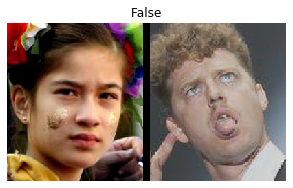

In [84]:
show_at(tls.valid, 1)

In [85]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor], 
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

In [87]:
@typedispatch
def show_batch(x:SiameseImage, y, samples, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n), nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs): SiameseImage(x[0][i], x[1][i], ['Not similar','Similar'][x[2][i].item()]).show(ctx=ctx)

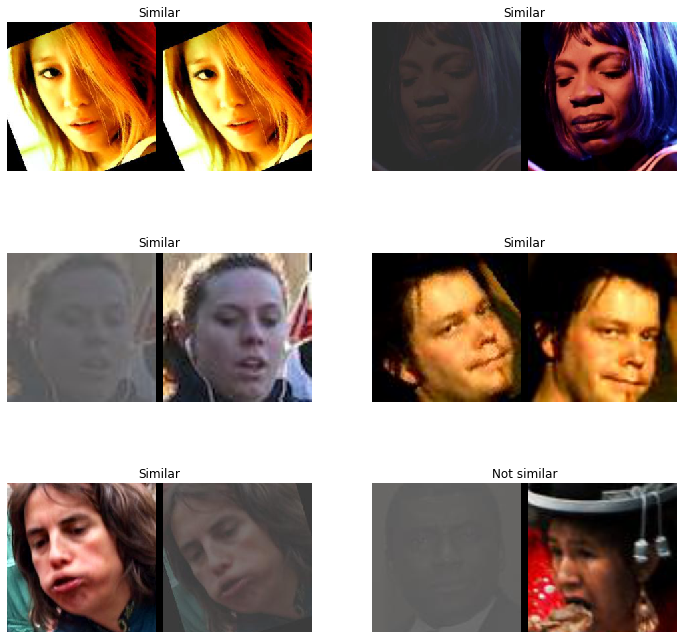

In [97]:
dls.show_batch()

## Using a Custom DataBlock

In [62]:
class ImageTuple(Tuple):
    @classmethod
    def create(cls, fns): return cls(tuple(PILImage.create(f) for f in fns))
    
    def show(self, ctx=None, **kwargs): 
        t1,t2 = self
        if not isinstance(t1, Tensor) or not isinstance(t2, Tensor) or t1.shape != t2.shape: return ctx
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2], dim=2), ctx=ctx, **kwargs)

In [63]:
def ImageTupleBlock(): return TransformBlock(type_tfms=ImageTuple.create, batch_tfms=IntToFloatTensor)

In [64]:
def draw_other(f):
    same = random.random() < 0.5
    cls = label_func(f)
    if not same: cls = random.choice(L(l for l in labels if l != cls)) 
    return random.choice(lbl2files[cls]),same

In [65]:
def get_tuple_files(path):
    files = get_image_files(path)
    return [[f, *draw_other(f)] for f in files]

In [66]:
def get_x(t): return t[:2]
def get_y(t): return t[2]

In [67]:
siamese = DataBlock(
    blocks=(ImageTupleBlock, CategoryBlock),
    get_items=get_tuple_files,
    get_x=get_x, get_y=get_y,
    splitter=RandomSplitter(),
    item_tfms=Resize(224),
    batch_tfms=[Normalize.from_stats(*imagenet_stats), *aug_transforms()]
)

In [68]:
dls = siamese.dataloaders(path/"images", path=path)

TypeError: 'NoneType' object is not iterable

In [ ]:
b = dls.one_batch()
explode_types(b)

{tuple: [{__main__.ImageTuple: [fastai2.torch_core.TensorImage,
    fastai2.torch_core.TensorImage]},
  fastai2.torch_core.TensorCategory]}

In [69]:
@typedispatch
def show_batch(x:ImageTuple, y, samples, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(len(samples), max_n), nrows=nrows, ncols=ncols, figsize=figsize)
    ctxs = show_batch[object](x, y, samples, ctxs=ctxs, max_n=max_n, **kwargs)
    return ctxs

In [ ]:
b = dls.one_batch()

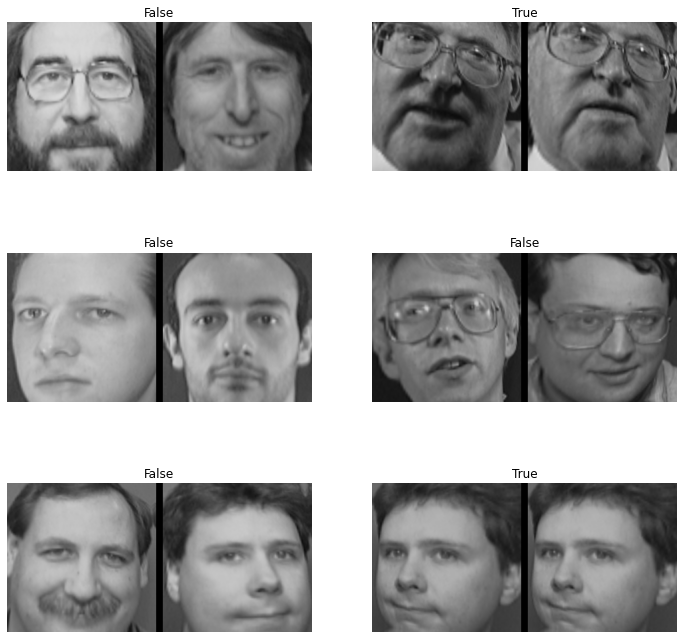

In [ ]:
dls.show_batch()

# Train the Model

In [7]:
class SiameseModel(Module):
    def __init__(self, encoder, head):
        self.encoder,self.head = encoder,head
    
    def forward(self, x1, x2):
        ftrs = torch.cat([self.encoder(x1), self.encoder(x2)], dim=1)
        return self.head(ftrs)

In [25]:
model_meta[resnet34]
#model_meta[xresnet50]

{'cut': -2,
 'split': <function fastai2.vision.learner._resnet_split(m)>,
 'stats': ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])}

In [8]:
encoder = create_body(resnet34, cut=-2)
#encoder = create_body(resnet50, cut=-4)

In [27]:
encoder[-1]

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1

In [9]:
head = create_head(512*4, 2, ps=0.5)
model = SiameseModel(encoder, head)

In [29]:
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=2048, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=2, bias=False)
)

In [10]:
def siamese_splitter(model):
    return [params(model.encoder), params(model.head)]

In [11]:
def loss_func(out, targ):
    return CrossEntropyLossFlat()(out, targ.long())

In [14]:
class SiameseTransform(Transform):
    def __init__(self, files, splits):
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
        
    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, int(t))
    
    def _draw(self, f):
        same = random.random() < 0.5
        cls = label_func(f)
        if not same: cls = random.choice(L(l for l in labels if l != cls)) 
        return random.choice(lbl2files[cls]),same

splits = RandomSplitter()(files)
tfm = SiameseTransform(files, splits)
tls = TfmdLists(files, tfm, splits=splits)
dls = tls.dataloaders(after_item=[Resize(224), ToTensor], 
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])    

In [15]:
#learn = Learner(dls, model, loss_func=loss_func, splitter=siamese_splitter, metrics=accuracy)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=siamese_splitter, metrics=accuracy)

In [34]:
# Download pretrained learner weights
#!gdown https://drive.google.com/uc?id=1-E2t4e4zYuSrOhDsnXu1-ijlzPxwuX-7
#learn.load('')

Downloading...
From: https://drive.google.com/uc?id=1-E2t4e4zYuSrOhDsnXu1-ijlzPxwuX-7
To: /home/bmayr/Dokumente/Projekte_lokal/MachineLearning/siamese_face_verification/face_verification_stage1-4ep-4e-3.pth
98.1MB [01:18, 1.25MB/s]


In [16]:
learn.freeze()

In [103]:
dls.dataset[0]

(PILImage mode=RGB size=274x319, PILImage mode=RGB size=104x121, 0)

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=1.0964781722577754e-06)

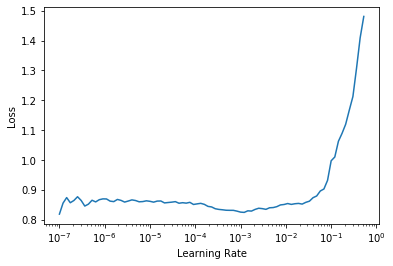

In [17]:
learn.lr_find()

In [ ]:
4e-3, 9.12010818865383e-07

(0.004, 9.12010818865383e-07)

In [18]:
#learn.fit_one_cycle(4, 10e-3)
learn.fit_one_cycle(1, 10e-3)
#learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.224468,0.145030,0.942669,02:47


In [39]:
learn.save('stage1-15e-3e-3')

In [19]:
learn.unfreeze()

In [31]:
learn.fit_one_cycle(30, slice(1e-6,1e-4))
#learn.fit_one_cycle(3, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.167633,0.117792,0.954553,03:43
1,0.171141,0.108959,0.958889,03:43
2,0.166468,0.109754,0.957443,03:43
3,0.150413,0.110833,0.956640,03:43
4,0.158051,0.097413,0.961298,03:43
5,0.138778,0.090205,0.965312,03:43
6,0.145886,0.088677,0.966276,03:43
7,0.131135,0.083222,0.968524,03:43
8,0.129741,0.085726,0.966437,03:43
9,0.130697,0.073783,0.972860,03:43


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
learn.save('stage2-unfreeze-30epochs-slice(1e-6,1e-4)')

In [43]:
learn.export('siamese-face-unfreezed.pkl')

In [21]:
@typedispatch
def show_results(x:SiameseImage, y, samples, outs, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n), nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs): 
        print("x[2]: ", x[2])
        title = f'Actual: {["Not similar","Similar"][x[2][i].item()]} \n Prediction: {["Not similar","Similar"][y[2][i].item()]}'
        SiameseImage(x[0][i], x[1][i], title).show(ctx=ctx)

x[2]:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])
x[2]:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])
x[2]:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])
x[2]:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])
x[2]:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 

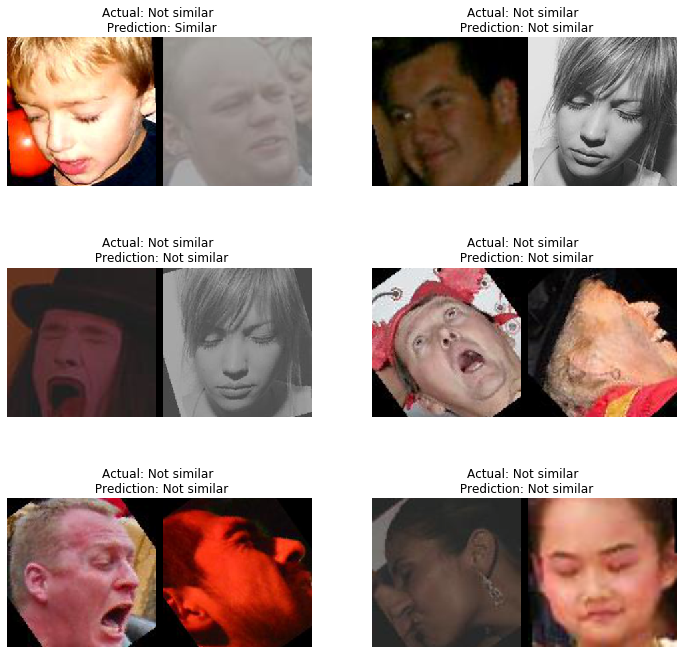

In [22]:
learn.show_results()



In [47]:
!gdown https://drive.google.com/uc?id=1A3fuK50ukiYN_CI9k6GHHr45OtcSq9vT

Downloading...
From: https://drive.google.com/uc?id=1A3fuK50ukiYN_CI9k6GHHr45OtcSq9vT
To: /home/bmayr/Dokumente/Projekte_lokal/MachineLearning/siamese_face_verification/test_images.zip
3.44MB [00:01, 1.88MB/s]


In [51]:
!unzip test_images.zip -d data
!rm -r data/__MACOSX

Archive:  test_images.zip
   creating: data/test_images/
  inflating: data/test_images/.DS_Store  
  inflating: data/__MACOSX/test_images/._.DS_Store  
   creating: data/test_images/h/
   creating: data/test_images/b/
  inflating: data/test_images/h/9.jpg  
  inflating: data/__MACOSX/test_images/h/._9.jpg  
  inflating: data/test_images/h/5.jpg  
  inflating: data/__MACOSX/test_images/h/._5.jpg  
  inflating: data/test_images/h/7.jpg  
  inflating: data/__MACOSX/test_images/h/._7.jpg  
  inflating: data/test_images/h/2.jpg  
  inflating: data/__MACOSX/test_images/h/._2.jpg  
  inflating: data/test_images/h/3.jpg  
  inflating: data/__MACOSX/test_images/h/._3.jpg  
  inflating: data/test_images/b/8.jpg  
  inflating: data/__MACOSX/test_images/b/._8.jpg  
  inflating: data/test_images/b/10.jpg  
  inflating: data/__MACOSX/test_images/b/._10.jpg  
  inflating: data/test_images/b/4.jpg  
  inflating: data/__MACOSX/test_images/b/._4.jpg  
  inflating: data/test_images/b/6.jpg  
  inflating:

In [23]:
@patch
def siampredict(self:Learner, item, rm_type_tfms=None, with_input=False):
    res = self.predict(item, rm_type_tfms=None, with_input=False)
    print(res)
    if res[0] == tensor(0):
        SiameseImage(item[0], item[1], 'Prediction: Not similar').show()
    else:
        SiameseImage(item[0], item[1], 'Prediction: Similar').show()
    return res

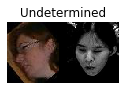

In [24]:
imgtest = PILImage.create(files[0])
imgval = PILImage.create(files[100])
siamtest = SiameseImage(imgval, imgtest)
siamtest.show();

(tensor(0), tensor(0), tensor([0.9984, 0.0016]))


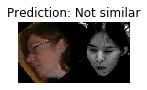

In [25]:
res = learn.siampredict(siamtest)

In [26]:
test_img_paths = get_image_files('data/test_images')
test_img_paths

(#10) [Path('data/test_images/b/4.jpg'),Path('data/test_images/b/1.jpg'),Path('data/test_images/b/6.jpg'),Path('data/test_images/b/10.jpg'),Path('data/test_images/b/8.jpg'),Path('data/test_images/h/3.jpg'),Path('data/test_images/h/7.jpg'),Path('data/test_images/h/2.jpg'),Path('data/test_images/h/5.jpg'),Path('data/test_images/h/9.jpg')]

In [27]:
def create_random_tests(filenames):
    file1 = random.choice(filenames)
    file2 = random.choice(filenames)
    same = True if str(file1) == str(file2) else False
    return PILImage.create(file1), PILImage.create(file2), same

In [28]:
learn.validate()

(#2) [0.12192767858505249,0.9531074166297913]

In [ ]:
learn.validate??

(tensor(1), tensor(1), tensor([0.0674, 0.9326]))


(tensor(0), tensor(0), tensor([0.6932, 0.3068]))


(tensor(1), tensor(1), tensor([0.0234, 0.9766]))


(tensor(1), tensor(1), tensor([0.1786, 0.8214]))


(tensor(1), tensor(1), tensor([0.0115, 0.9885]))


(tensor(1), tensor(1), tensor([0.0613, 0.9387]))


(tensor(1), tensor(1), tensor([0.0247, 0.9753]))


(tensor(0), tensor(0), tensor([0.5395, 0.4605]))


(tensor(1), tensor(1), tensor([0.1764, 0.8236]))


(tensor(1), tensor(1), tensor([0.1224, 0.8776]))
correct:  0  -->  0.0


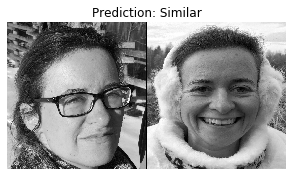

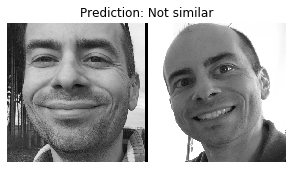

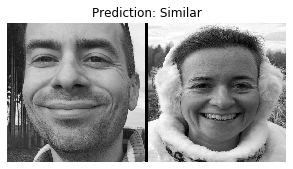

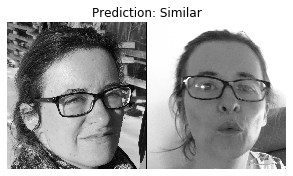

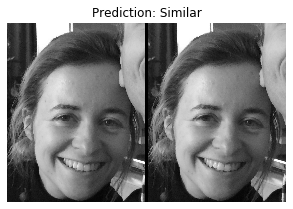

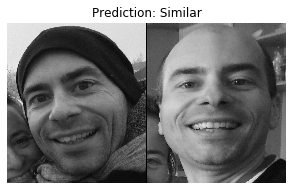

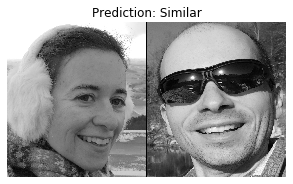

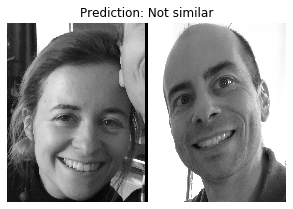

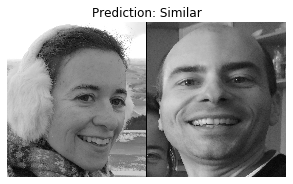

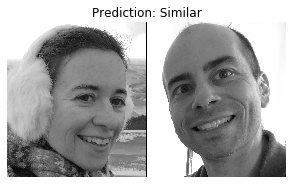

In [30]:
correct = 0
for i in range(10):
    imgtest, imgval, same = create_random_tests(test_img_paths)
    siamtest = SiameseImage(imgval, imgtest)    
    res = learn.siampredict(siamtest)
    
print("correct: ", correct, " --> ", correct/30)

